## TTT4275 Classification Project: Music Classification

In [1]:
# Imports
import source.data_handling
import source.mappings
import source.plotting
import source.diy_classifiers

import numpy as np

# uncomment following line and restart the kernel for interactive plots 
#%matplotlib notebook

In [2]:
# Load the dataset and split into training and test
# X = M x N dataset with M samples of N features

data_version = source.data_handling.GENRE_CLASS_DATA_30S
data_set = source.data_handling.read_genre_class_data(data_version)

features = source.mappings.MUSIC_FEATURES_ALL

training_data, test_data = source.data_handling.prepare_data(
        data_frame=data_set,
        features=features,
    )
print(len(features))
print(training_data.y)
print(type(data_set))

63
0       pop
1       pop
2       pop
3       pop
4       pop
       ... 
787    jazz
788    jazz
789    jazz
790    jazz
791    jazz
Name: Genre, Length: 792, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [3]:
print(source.data_handling.GENRE_CLASS_DATA_30S)
print(source.data_handling._file_path)

c:\Users\Ivan\OneDrive - NTNU\Desktop\V22\EDC\ttt4275-music-classification\source\..\resources\data\GenreClassData_30s.txt
c:\Users\Ivan\OneDrive - NTNU\Desktop\V22\EDC\ttt4275-music-classification\source


## Task 1 Plots

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


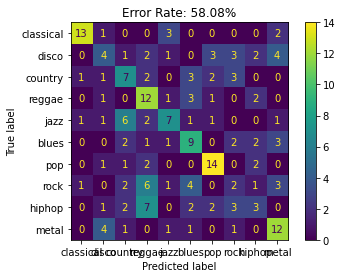

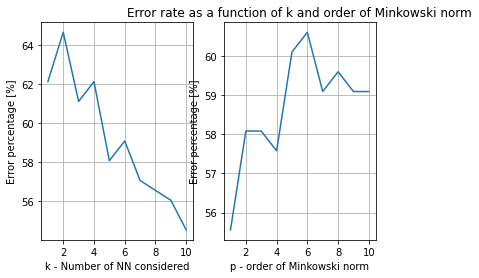

In [4]:
# kNN parameters
k = 5
features_task_1 = ["spectral_rolloff_mean", "tempo", "spectral_centroid_mean", "mfcc_1_mean"]

training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
    features=features_task_1,
)

y_pred_task1 = source.diy_classifiers.kNN(k=5, train_data=training_data, test_data=test_data, p=2)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)

Using the above confusion matrix we can take some genres and plot their overlap.
Good contenders are blues vs. country and pop vs. disco as they both have a total of nine misclassifications each.

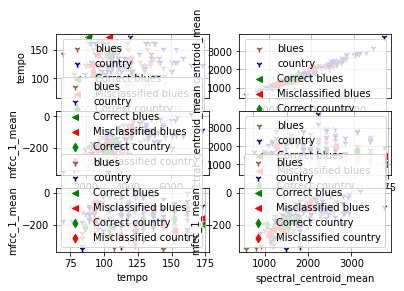

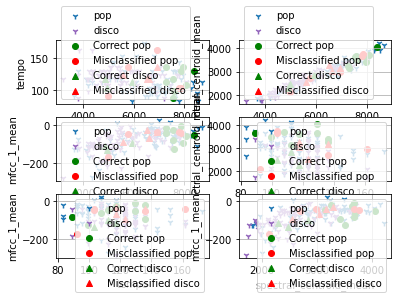

In [4]:
import copy

genre_combos = [
    ["blues", "country"],
    ["pop", "disco"],
]

def apply_indices_to_dataset(
    data_set,
    indices,
):
    data_set.x = data_set.x.iloc[indices]
    data_set.y = data_set.y.iloc[indices]
    data_set.track_ids = data_set.track_ids.iloc[indices]
    
    return data_set

for combo in genre_combos:
    # Filter out all indices that should be either of the two genres and are classified
    # as either of the two given genres
    train_genre_indices = np.flatnonzero(
        np.array(training_data.data_frame["Genre"] == combo[0])
        + np.array(training_data.data_frame["Genre"] == combo[1])
    )
    test_genre_indices = np.flatnonzero(
        np.array(test_data.data_frame["Genre"] == combo[0])
        + np.array(test_data.data_frame["Genre"] == combo[1])
    )
    
    result_indices = np.flatnonzero((y_pred_task1 == combo[0]) + (y_pred_task1 == combo[1])) 
    test_indices = list(filter(lambda x: x in test_genre_indices, result_indices))

    train_data_copy = copy.deepcopy(training_data)
    test_data_copy = copy.deepcopy(test_data)
    
    # Plot the training data for the two given genres and plot the data points
    # from the test data and if they were correctly / falsely classified
    source.plotting.misclassifications_scatter_plot(
        training_data=apply_indices_to_dataset(train_data_copy, train_genre_indices),
        test_data=apply_indices_to_dataset(test_data_copy, test_indices),
        predicted_genres=y_pred_task1[test_indices],
        features=features_task_1,
        genres=combo,
    )

### KNN Parameters
Using all features we plot the error rates with respect to the number of neighbors and using different orders of the Minkowski order (p).
Once for our own implementation of the kNN classifier

In [ ]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

ks = np.arange(20) + 1
ps = np.arange(10) + 1

print(ks)
print(ps)


y_pred_task1 = source.diy_classifiers.kNN(k, training_data, test_data, p=2)
y_true_task1 = test_data.y

source.plotting.confusion_matrix(y_true_task1, y_pred_task1)
source.plotting.error_rates_vs_params(ks, ps, training_data, test_data)


## Task 2 Plots


In [ ]:
# Crazy code

## Task 3 Plots

In [ ]:
# Crazy code

## Task 4 plots

In [ ]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

pipelines = [
    sklearn.pipeline.Pipeline([
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ]),
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ]),
]

for pipeline in pipelines:
    pipeline.fit(training_data.x, training_data.y)
    predict_y = pipeline.predict(test_data.x)
    
    source.plotting.confusion_matrix(test_data.y, predict_y)

#### Dimension Reduction
Instead of having to run the classifier on all dimensions we can try to reduce the dimensions. For the KNN approach this will help with computing the distances once the dataset actually gets larger.
For now we can think of using:
- principle component analysis
- partial least squares discriminant analysis
- autoencoder

##### Principle Component Analysis

In [ ]:
training_data, test_data = source.data_handling.prepare_data(
    data_frame=data_frame,
)

pca_pipelines = [
    ('KNN - no PCA all features', sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('KNN - all PCA components', sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA()),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('KNN - 15 first PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA(n_components=15)),
        ('classifier', sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)),
    ])),
    ('SVM - no PCA all features',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
    ('SVM - all PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA()),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
    ('SVM - 15 first PCA components',
    sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.MaxAbsScaler()),
        ('reduce_dimension', sklearn.decomposition.PCA(n_components=15)),
        ('classifier', sklearn.svm.SVC(kernel='rbf', decision_function_shape='ovo')),
    ])),
]

for name, pipeline in pca_pipelines:
    print(name)
    pipeline.fit(training_data.x, training_data.y)
    predict_y = pipeline.predict(test_data.x)
    
    source.plotting.confusion_matrix(test_data.y, predict_y)

The observed results would imply that PCA does not positively affect the KNN classifier in anyway, but it could do so when using an SVM as the classifier method.

#### Classifier
So far we have only used the KNN classifier. Here we can also consider alternatives and the list to explore could look like:
- KNN
- Support Vector Machines
- Multi Layer Perceptron